In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [4]:
def count_132(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-2):
        for j in range(i+1,n-1):
            if P[i] < P[j]:
                for k in range(j+1,n):
                    if P[j] > P[k] and P[i] < P[k]:
                        C = C + 1
    return C

In [5]:
def count_42351(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-4):
        for j in range(i+1,n-3):
            if P[i] > P[j]:
                for k in range(j+1,n-2):
                    if P[k] < P[i] and P[k] > P[j]:
                        for l in range(k+1,n-1):
                            if P[l] > P[i]:
                                for h in range(l+1,n):
                                    if P[h]<P[j]:
                                        C = C+1
    return C

In [6]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [7]:
def crossover1(P1,P2):
    n = len(P1)
    offspring = [-1]*n
    r = random.random()
    if r < 0.5:
        offspring[0] = P1[0]
    else:
        offspring[0] = P2[0]
    for i in range(1,n):
        r = random.random()
        if r < 0.5:
            j = i
            while P1[j] in offspring:
                j = (j+1) % n
            offspring[i] = P1[j]
        else:
            j = i
            while P2[j] in offspring:
                j = (j+1) % n
            offspring[i] = P2[j]
    return offspring

In [8]:
def crossover2(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    return [child1,child2]

In [19]:
def crossover3(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [9]:
def mut1(Perm,r1,r2):
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output

def mutation1(Perm):
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [10]:
#CROSSOVER3


In [24]:
def Evolutionary_Algorithm3_42351_AV132(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_42351(P)/(count_132(P)+0.01)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_42351(child1)/(count_132(child1)+0.01)
        fitness2 = count_42351(child2)/(count_132(child2)+0.01)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1,count_42351(child1),count_132(child1)]]
        POP = POP + [[fitness2,child2,count_42351(child2),count_132(child2)]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 10000 == 0:
            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [11]:
def Evolutionary_Algorithm3_42351_AV132_POP(n,POPULATION):
    #initialize population and compute fitness for each individual
    POP = POPULATION
    #start the loop
    fe = 0
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_42351(child1)/(count_132(child1)+0.01)
        fitness2 = count_42351(child2)/(count_132(child2)+0.01)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1,count_42351(child1),count_132(child1)]]
        POP = POP + [[fitness2,child2,count_42351(child2),count_132(child2)]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 10000 == 0:
            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [13]:
def Evolutionary_Algorithm2_42351(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_42351(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_42351(child1)
        fitness2 = count_42351(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 10000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [15]:
def Evolutionary_Algorithm2_42351_POP(n,POPULATION):
    #initialize population and compute fitness for each individual
    POP = POPULATION
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_42351(child1)
        fitness2 = count_42351(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 10000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[10000] [717738, 711490, 698362, 697461, 692343, 688110, 687268, 687127, 686127, 684768] [139974]


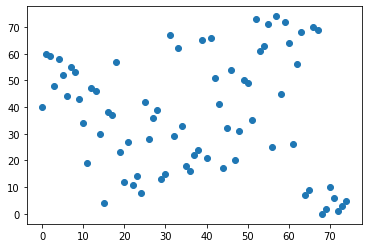

[20000] [919546, 910547, 904255, 904255, 900639, 900258, 899743, 897543, 893649, 890163] [243239]


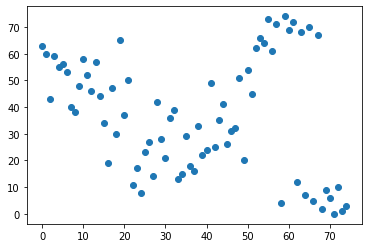

[30000] [1015481, 1000333, 987725, 980741, 980737, 979112, 977024, 976976, 976976, 971631] [569048]


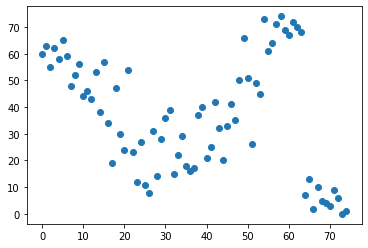

[40000] [1063022, 1061120, 1058538, 1057690, 1053280, 1053280, 1053075, 1052855, 1051519, 1051519] [745945]


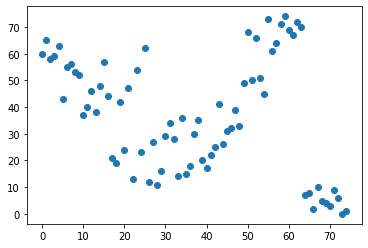

[50000] [1133115, 1132682, 1129142, 1124097, 1118210, 1118210, 1117435, 1115331, 1114739, 1114559] [842656]


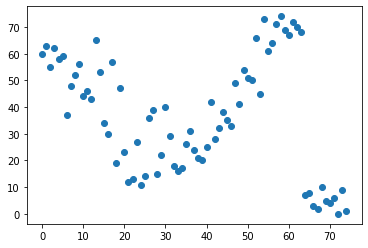

[60000] [1171630, 1168903, 1168849, 1167081, 1166861, 1165517, 1165517, 1164847, 1164491, 1163305] [916344]


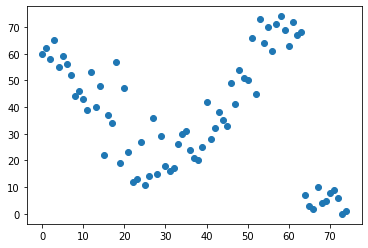

[70000] [1212748, 1208120, 1207538, 1207507, 1207498, 1207496, 1207496, 1207496, 1207494, 1207490] [983070]


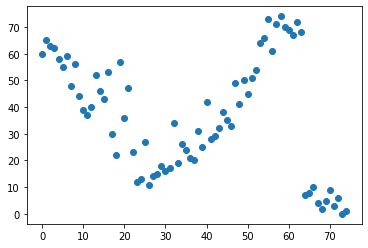

[80000] [1257401, 1252902, 1251954, 1251465, 1250736, 1249753, 1246593, 1242105, 1241913, 1241521] [1040329]


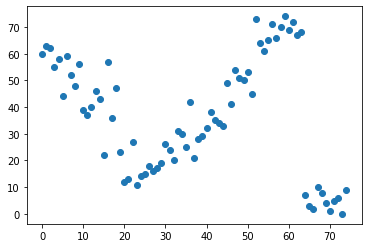

[90000] [1286762, 1286750, 1286750, 1286135, 1279328, 1278770, 1278388, 1276379, 1275842, 1274268] [1090366]


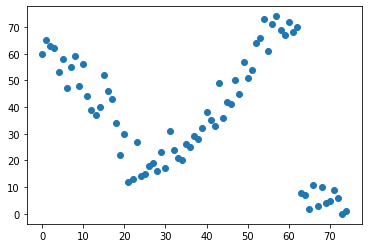

[100000] [1338313, 1331628, 1327697, 1327697, 1327697, 1327695, 1327692, 1327670, 1326773, 1319599] [1132300]


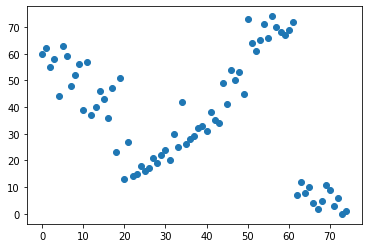

[110000] [1346677, 1341741, 1341276, 1341151, 1340384, 1340382, 1340363, 1339639, 1338717, 1338453] [1168028]


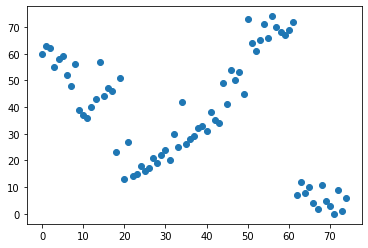

[120000] [1380933, 1380364, 1378790, 1373071, 1373071, 1372965, 1372960, 1372103, 1371441, 1369120] [1201196]


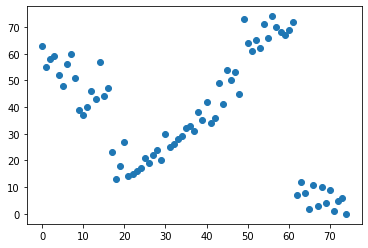

[130000] [1409752, 1409728, 1405343, 1402322, 1402253, 1402248, 1398806, 1398714, 1398370, 1398070] [1233767]


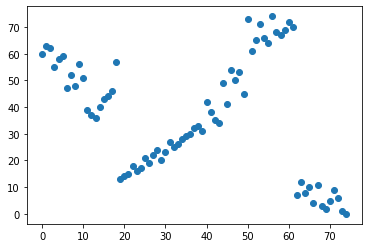

[140000] [1430303, 1426472, 1426349, 1424715, 1424207, 1424192, 1423774, 1423580, 1423249, 1423188] [1267274]


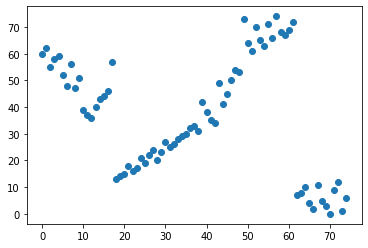

[150000] [1446167, 1444672, 1444569, 1444569, 1444564, 1444554, 1444166, 1443822, 1443789, 1443538] [1300155]


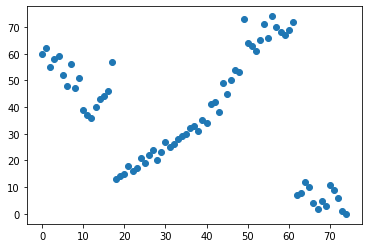

[160000] [1457523, 1457312, 1456792, 1456733, 1456239, 1456103, 1455448, 1454936, 1454936, 1454836] [1330576]


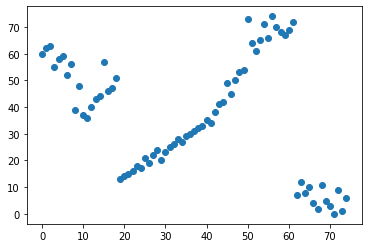

[170000] [1473684, 1473182, 1470198, 1469838, 1469838, 1469836, 1469836, 1469829, 1469829, 1469755] [1355926]


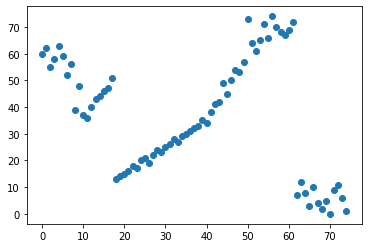

[180000] [1478977, 1478629, 1478570, 1478202, 1478187, 1478187, 1477894, 1477350, 1477340, 1477332] [1377322]


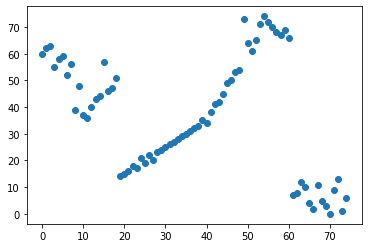

[190000] [1488966, 1487318, 1485425, 1484698, 1484688, 1484601, 1484592, 1484456, 1483769, 1483071] [1396311]


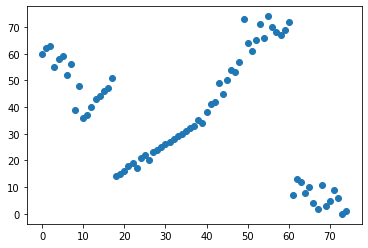

[200000] [1493190, 1491931, 1491295, 1490627, 1489965, 1489413, 1489413, 1488966, 1488951, 1488555] [1411514]


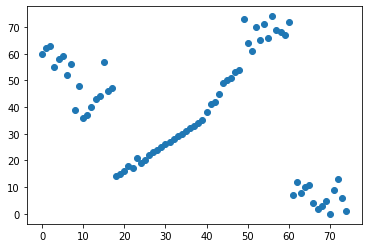

In [14]:
EA75 = Evolutionary_Algorithm2_42351(75)

[10000] [1499583, 1499074, 1498812, 1497798, 1497774, 1497771, 1497771, 1497771, 1497729, 1497690] [1424108]


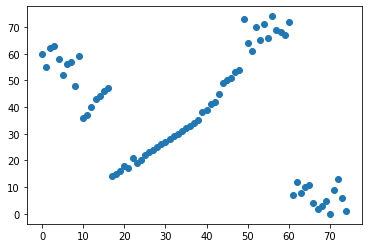

[20000] [1506735, 1506735, 1506726, 1506600, 1506600, 1506600, 1506600, 1506023, 1505420, 1505294] [1437939]


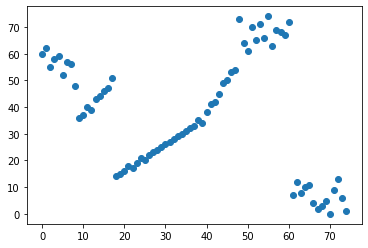

[30000] [1510894, 1510894, 1510894, 1510887, 1510885, 1510885, 1510885, 1510885, 1510885, 1510885] [1446494]


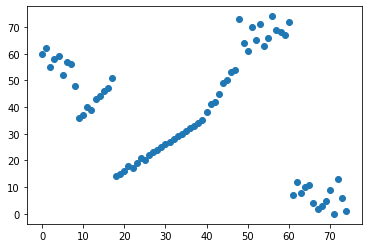

[40000] [1518298, 1517812, 1516149, 1514043, 1513764, 1513389, 1513366, 1513366, 1513364, 1513338] [1456514]


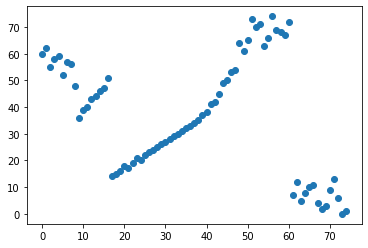

[50000] [1521130, 1521130, 1519222, 1519129, 1519101, 1519076, 1519058, 1519050, 1519046, 1519031] [1465801]


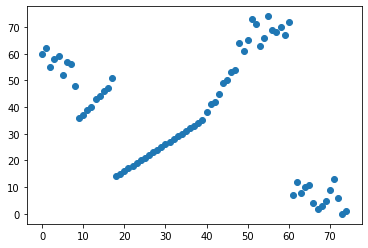

[60000] [1522645, 1522301, 1522301, 1522231, 1522217, 1522182, 1522182, 1522133, 1522133, 1522038] [1473008]


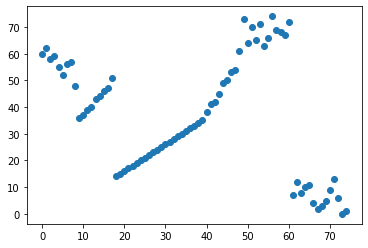

[70000] [1523603, 1523603, 1523603, 1523589, 1523589, 1523477, 1523477, 1523396, 1523351, 1523351] [1480627]


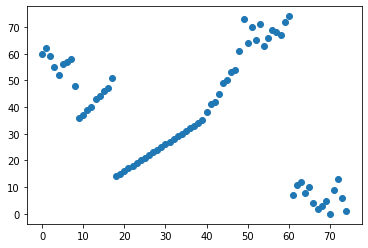

[80000] [1526046, 1525787, 1525787, 1525712, 1525613, 1524576, 1523981, 1523911, 1523877, 1523855] [1488514]


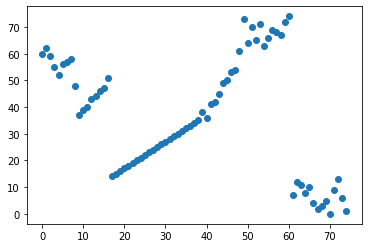

[90000] [1530302, 1530215, 1530215, 1530176, 1530176, 1530175, 1530103, 1529086, 1528696, 1527868] [1495281]


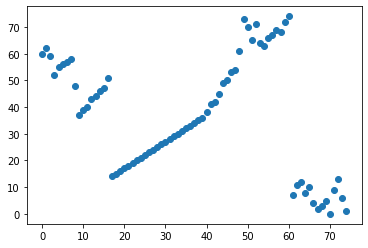

[100000] [1532218, 1532218, 1532218, 1532213, 1532193, 1532190, 1531969, 1531904, 1531759, 1530527] [1500421]


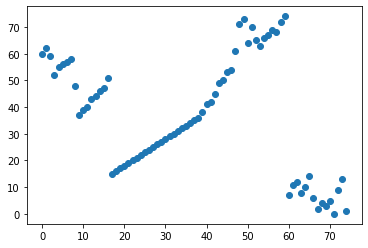

[110000] [1534056, 1534056, 1534023, 1534023, 1534008, 1532502, 1532448, 1532448, 1532443, 1532432] [1507018]


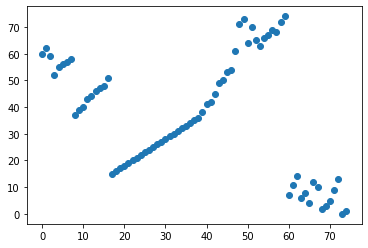

[120000] [1534252, 1534228, 1534228, 1534228, 1534224, 1534224, 1534224, 1534224, 1534224, 1534224] [1511958]


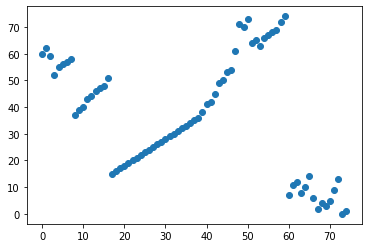

[130000] [1534624, 1534624, 1534602, 1534568, 1534550, 1534543, 1534543, 1534536, 1534526, 1534500] [1514111]


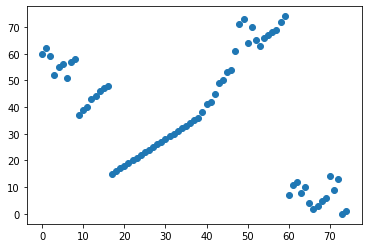

[140000] [1535775, 1535775, 1535715, 1535715, 1535715, 1535715, 1535700, 1535700, 1535700, 1535700] [1518738]


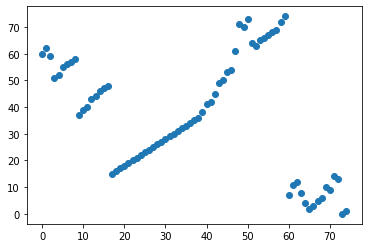

[150000] [1537140, 1536420, 1536030, 1536030, 1535994, 1535979, 1535970, 1535970, 1535970, 1535970] [1521985]


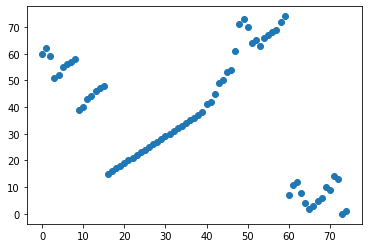

[160000] [1537560, 1537560, 1537455, 1537449, 1537429, 1537395, 1537395, 1537395, 1537395, 1537395] [1523151]


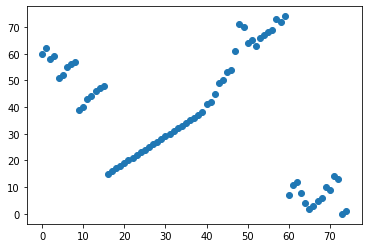

[170000] [1537983, 1537830, 1537830, 1537830, 1537830, 1537830, 1537830, 1537830, 1537830, 1537830] [1523841]


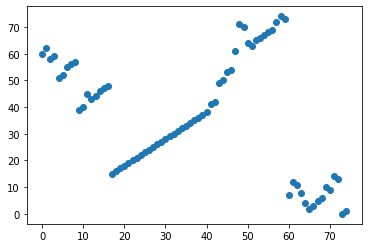

[180000] [1539663, 1539661, 1539657, 1539657, 1539655, 1539645, 1539645, 1539645, 1539645, 1539645] [1526466]


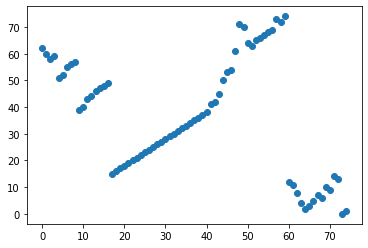

[190000] [1541419, 1541419, 1541419, 1541413, 1541409, 1541409, 1541401, 1541401, 1541401, 1541401] [1530343]


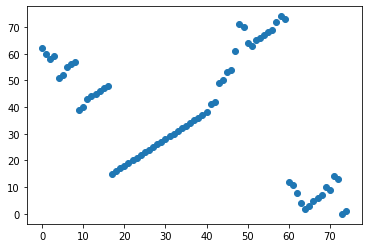

[200000] [1541584, 1541574, 1541556, 1541556, 1541554, 1541554, 1541554, 1541554, 1541554, 1541554] [1531998]


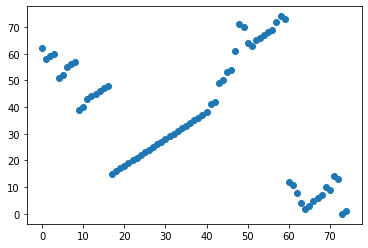

In [16]:
 EA752 = Evolutionary_Algorithm2_42351_POP(75,EA75)

[10000] [1541856, 1541745, 1541745, 1541745, 1541745, 1541745, 1541729, 1541729, 1541729, 1541729] [1534055]


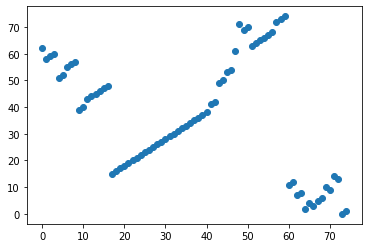

[20000] [1541892, 1541892, 1541892, 1541886, 1541880, 1541880, 1541880, 1541880, 1541880, 1541880] [1534253]


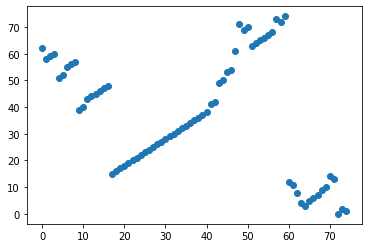

[30000] [1541892, 1541892, 1541892, 1541892, 1541892, 1541892, 1541892, 1541892, 1541892, 1541892] [1534770]


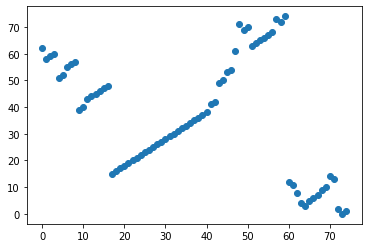

[40000] [1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916] [1535715]


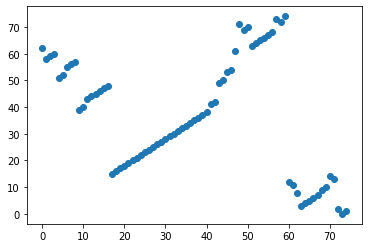

[50000] [1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916] [1536135]


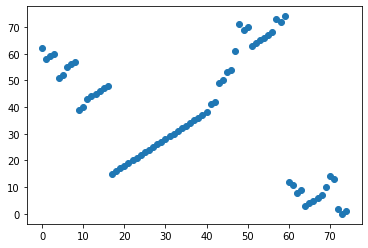

[60000] [1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916] [1537560]


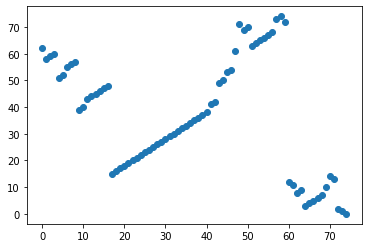

[70000] [1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916] [1537830]


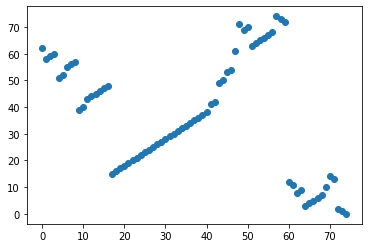

[80000] [1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916] [1539657]


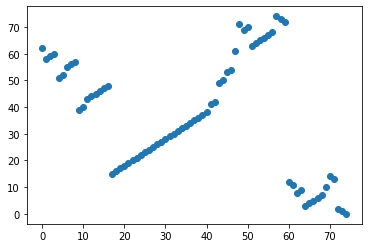

[90000] [1541919, 1541919, 1541919, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916, 1541916] [1541409]


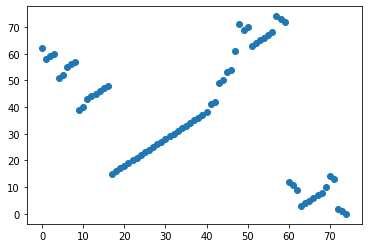

[100000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541554]


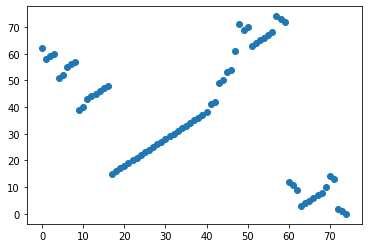

[110000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541729]


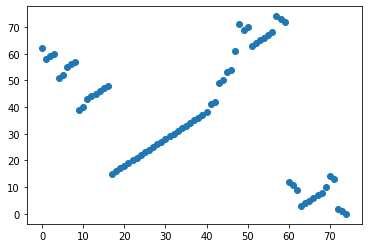

[120000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541864]


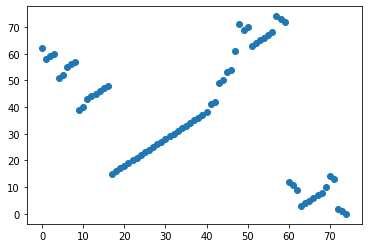

[130000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541892]


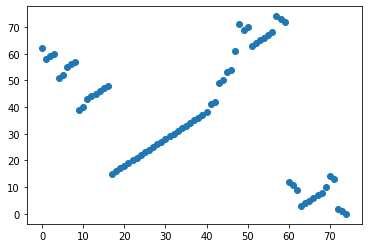

[140000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541916]


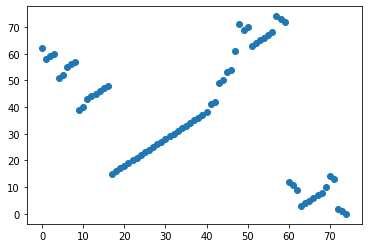

[150000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541916]


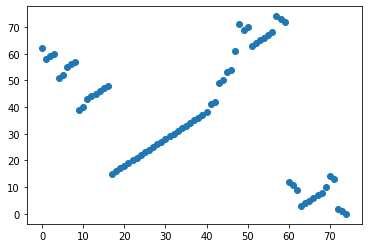

[160000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541916]


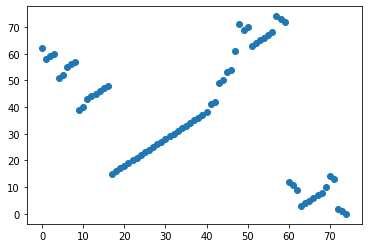

[170000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541916]


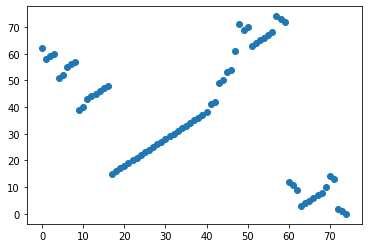

[180000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541916]


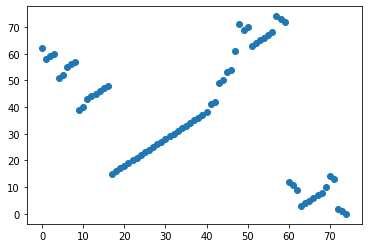

[190000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541916]


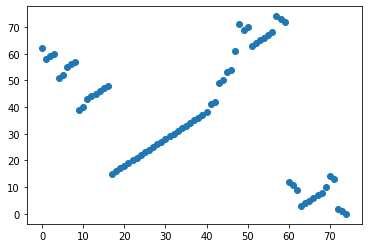

[200000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


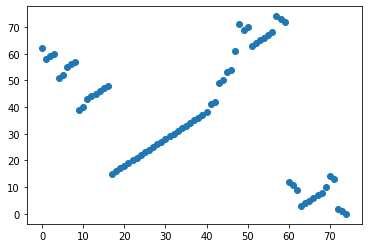

In [17]:
 EA753 = Evolutionary_Algorithm2_42351_POP(75,EA752)

[10000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


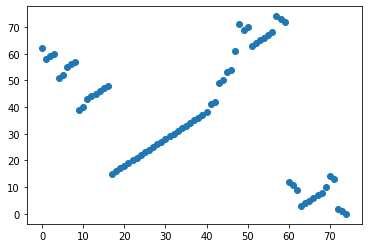

[20000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


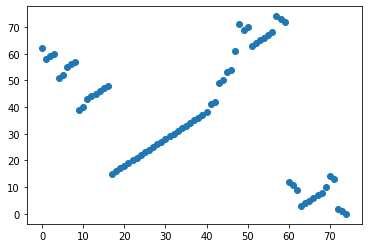

[30000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


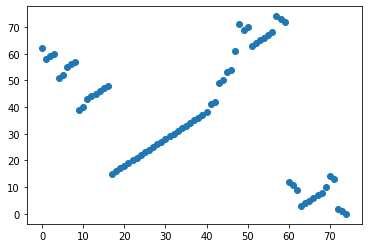

[40000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


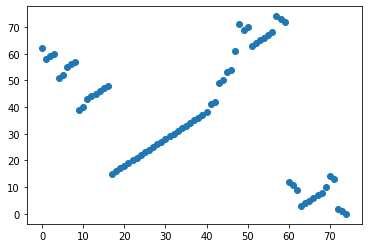

[50000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


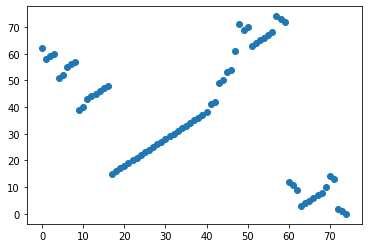

[60000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


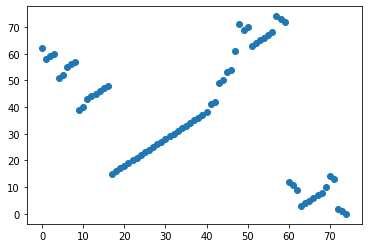

[70000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


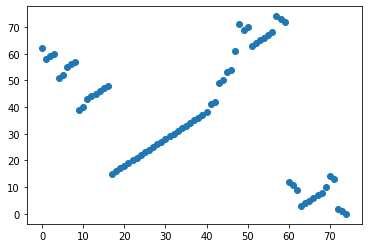

[80000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


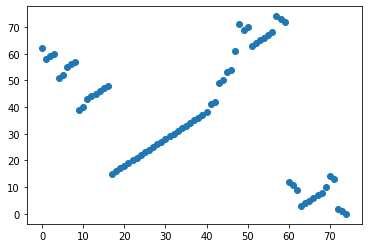

[90000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


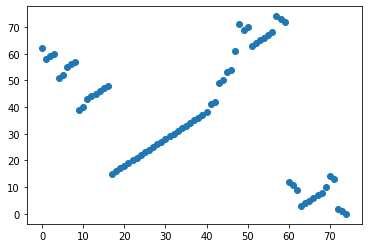

[100000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


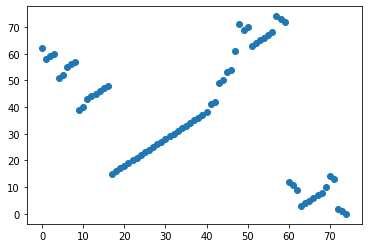

[110000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


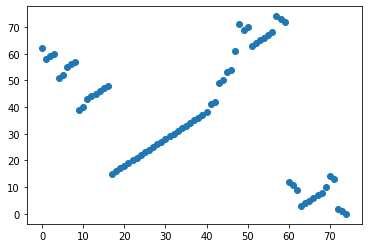

[120000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


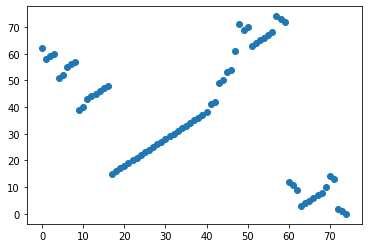

[130000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


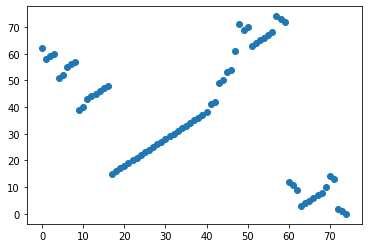

[140000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


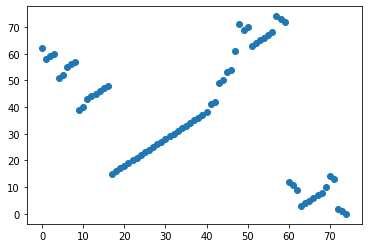

[150000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


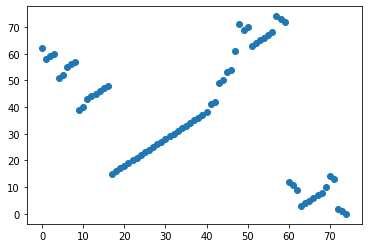

[160000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


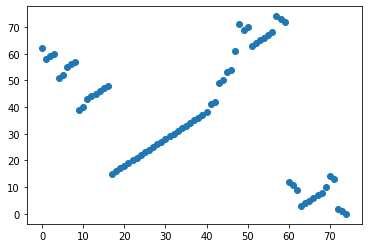

[170000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


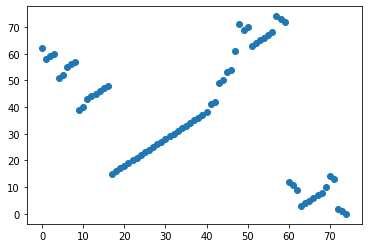

[180000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


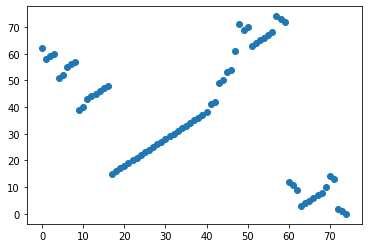

[190000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


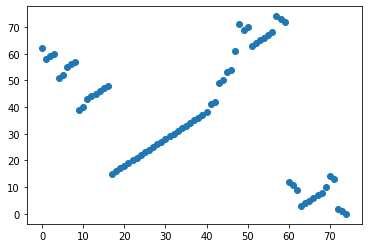

[200000] [1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919, 1541919] [1541919]


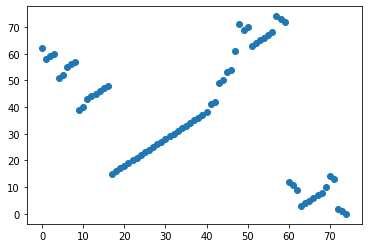

In [18]:
 EA754 = Evolutionary_Algorithm2_42351_POP(75,EA753)